In [41]:
import getData
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [42]:
cow_amm_address = '0x301076c36e034948a747bb61bab9cd03f62672e3' #WETH/USDC
cow_amm_address = '0x027e1cbf2c299cba5eb8a2584910d04f1a8aa403' #SAFE/WETH
cow_amm_address = '0x1c7828dadade12a848f36be8e2d3146462abff68' #GNO/OLAS
#cow_amm_address = '0xbeef5afe88ef73337e5070ab2855d37dbf5493a4' #COW/WETH
df = getData.data(cow_amm_address)

2024-06-26 15:44:26,850 INFO dune_client.api.base executing 3726052 on medium cluster
2024-06-26 15:44:27,529 INFO dune_client.api.base waiting for query execution 01J1ACMR39S2M4974MMN10VYSK to complete: ExecutionState.PENDING (queue position: 1)
2024-06-26 15:44:28,571 INFO dune_client.api.base waiting for query execution 01J1ACMR39S2M4974MMN10VYSK to complete: ExecutionState.EXECUTING
2024-06-26 15:44:29,613 INFO dune_client.api.base waiting for query execution 01J1ACMR39S2M4974MMN10VYSK to complete: ExecutionState.EXECUTING
2024-06-26 15:44:30,660 INFO dune_client.api.base waiting for query execution 01J1ACMR39S2M4974MMN10VYSK to complete: ExecutionState.EXECUTING
2024-06-26 15:44:31,705 INFO dune_client.api.base waiting for query execution 01J1ACMR39S2M4974MMN10VYSK to complete: ExecutionState.EXECUTING
2024-06-26 15:44:32,754 INFO dune_client.api.base waiting for query execution 01J1ACMR39S2M4974MMN10VYSK to complete: ExecutionState.EXECUTING
2024-06-26 15:44:33,798 INFO dune_clie

In [43]:
print(df.columns) 

Index(['blockchain', 'cow_amm_address', 'token0_address', 'token1_address',
       'token0_balance', 'token0_balance_usd', 'token1_balance',
       'token1_balance_usd', 'time', 'token0_transfer', 'token1_transfer',
       'tx_hash', 'provision_rebalancing', 'decimals0', 'price0',
       'contract_address0', 'minute', 'decimals1', 'price1',
       'contract_address1'],
      dtype='object')


In [44]:
def alphap(X,Y,f=0.01, g = 4):
    beta = np.sqrt(X*Y)
    return (2+f+g/beta+np.sqrt((g/beta+f)**2+4*g/beta))/2

def alpham(X,Y, f = 0.01, g = 4):
    beta = np.sqrt(X*Y)
    return 2/(2+f+g/beta+np.sqrt((g/beta+f)**2+4*g/beta))


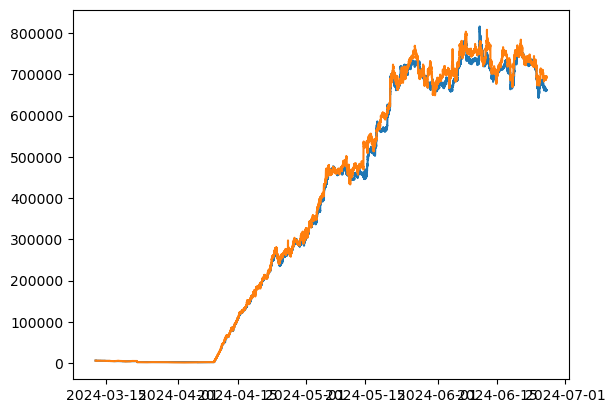

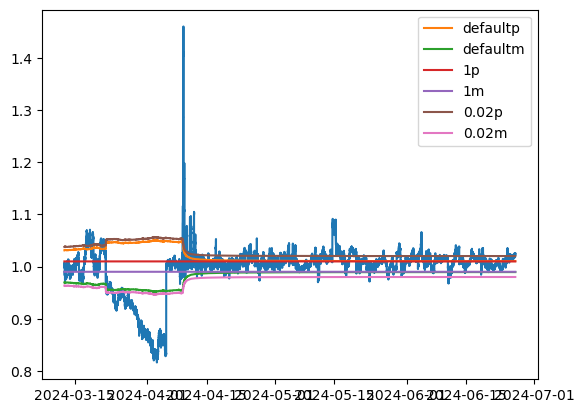

In [45]:
plt.plot(df['minute'],df['token0_balance_usd'])
plt.plot(df['minute'],df['token1_balance_usd'])
plt.show()

plt.plot(df['minute'],np.sqrt((df['token0_balance_usd'])**-1*(df['token1_balance_usd'])))

plt.plot(df['minute'], alphap(df['token0_balance_usd'],df['token1_balance_usd']), label = 'defaultp')
plt.plot(df['minute'], alpham(df['token0_balance_usd'],df['token1_balance_usd']), label = 'defaultm')
plt.plot(df['minute'], alphap(df['token0_balance_usd'],df['token1_balance_usd'], g=0), label = '1p')
plt.plot(df['minute'], alpham(df['token0_balance_usd'],df['token1_balance_usd'], g= 0), label = '1m')
plt.plot(df['minute'], alphap(df['token0_balance_usd'],df['token1_balance_usd'], f=0.02), label = '0.02p')
plt.plot(df['minute'], alpham(df['token0_balance_usd'],df['token1_balance_usd'], f=0.02), label = '0.02m')
plt.legend()
plt.show()

In [46]:
# Créer un modèle GARCH
model1 = arch_model(100*df['price1'], vol='Garch', p=1, q=1)

# Ajuster le modèle
model_fit1 = model1.fit()

# Afficher le résumé du modèle
print(model_fit1.summary())

# Créer un modèle GARCH
model0 = arch_model(0.1*df['price0'], vol='Garch', p=1, q=1)

# Ajuster le modèle
model_fit0 = model0.fit()

# Créer un modèle GARCH
model = arch_model(0.01*df['price0']/df['price1'], vol='Garch', p=1, q=1)

# Ajuster le modèle
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit0.summary())

c:\Users\Paul CoW\miniconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.203e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3052955.1760307457
Iteration:      2,   Func. Count:     12,   Neg. LLF: 851246.0146631266
Iteration:      3,   Func. Count:     17,   Neg. LLF: 920877.5664670523
Iteration:      4,   Func. Count:     24,   Neg. LLF: 832916.9232361916
Iteration:      5,   Func. Count:     29,   Neg. LLF: 821390.3797738308
Iteration:      6,   Func. Count:     34,   Neg. LLF: 13431401.333203703
Iteration:      7,   Func. Count:     46,   Neg. LLF: 820493.7536871767
Iteration:      8,   Func. Count:     51,   Neg. LLF: 951872304.2770928
Iteration:      9,   Func. Count:     57,   Neg. LLF: 820409.7408403137
Iteration:     10,   Func. Count:     63,   Neg. LLF: 819632.885970637
Iteration:     11,   Func. Count:     68,   Neg. LLF: 819603.1293322152
Iteration:     12,   Func. Count:     73,   Neg. LLF: 838260.663371606
Iteration:     13,   Func. Count:     79,   Neg. LLF: 825384.5973535237
Iteration:     14,   Func. Count:     85,   Neg. LLF: 820513.652

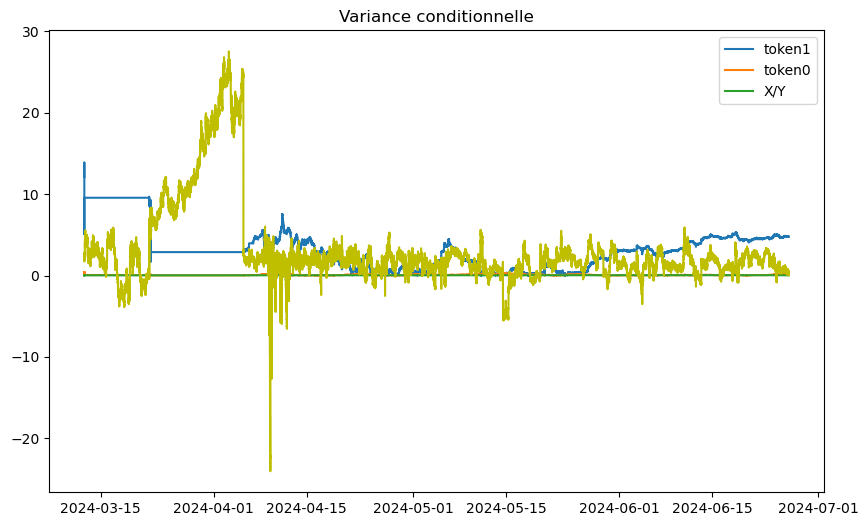

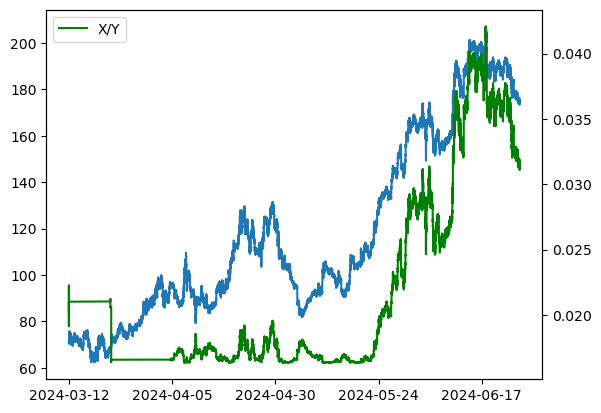

In [47]:
# Obtenir la variance conditionnelle
conditional_var = model_fit1.conditional_volatility/25

# Afficher la variance conditionnelle
#print(conditional_var)

# Créer un graphique de la variance conditionnelle
plt.figure(figsize=(10, 6))
plt.plot(df['time'], conditional_var, label = 'token1')

# Obtenir la variance conditionnelle
conditional_var = model_fit0.conditional_volatility/25

# Afficher la variance conditionnelle
#print(conditional_var)

# Créer un graphique de la variance conditionnelle
plt.plot(df['time'], conditional_var, label = 'token0')

# Obtenir la variance conditionnelle
conditional_var = model_fit.conditional_volatility/25

# Afficher la variance conditionnelle
#print(conditional_var)

# Créer un graphique de la variance conditionnelle
plt.plot(df['time'], conditional_var, label ='X/Y')


plt.plot(df['minute'],(df['price0']*df['token0_balance']/(df['price1']*df['token1_balance'])-0.95)*50, color = 'y')
plt.title('Variance conditionnelle')
plt.legend()
plt.show()
fig,ax1 = plt.subplots()
ax1.plot(df['minute'], df['price0']/df['price1'])
ax2 = ax1.twinx()
ax2.plot(df['time'], conditional_var, label ='X/Y', color ='g')
ax1.set_xticks(df['minute'][::35000])
plt.legend()
plt.show()

C:\Users\Paul CoW\AppData\Local\Temp\ipykernel_8276\2408774034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['minute_diff'] = df2['minute'].diff()
C:\Users\Paul CoW\AppData\Local\Temp\ipykernel_8276\2408774034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['minute_diff'] = df2['minute_diff'] / np.timedelta64(1, 'm')


Iteration:      1,   Func. Count:      6,   Neg. LLF: 361988623406.6248
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1670897.726354497
Iteration:      3,   Func. Count:     31,   Neg. LLF: 9352521808.226603
Iteration:      4,   Func. Count:     42,   Neg. LLF: 2.3767671150934656e+24
Iteration:      5,   Func. Count:     57,   Neg. LLF: 2405863435924.0786
Iteration:      6,   Func. Count:     72,   Neg. LLF: 1689007679.7293859
Iteration:      7,   Func. Count:     81,   Neg. LLF: 405060.031312384
Iteration:      8,   Func. Count:     87,   Neg. LLF: 169337.7017282896
Iteration:      9,   Func. Count:     93,   Neg. LLF: 65616067545.49518
Iteration:     10,   Func. Count:    108,   Neg. LLF: 59444363721.17446
Iteration:     11,   Func. Count:    114,   Neg. LLF: 2775260239.8711815
Iteration:     12,   Func. Count:    126,   Neg. LLF: 69237.32208171207
Iteration:     13,   Func. Count:    130,   Neg. LLF: 69237.3226816262
Optimization terminated successfully    (Exit mode 0)
    

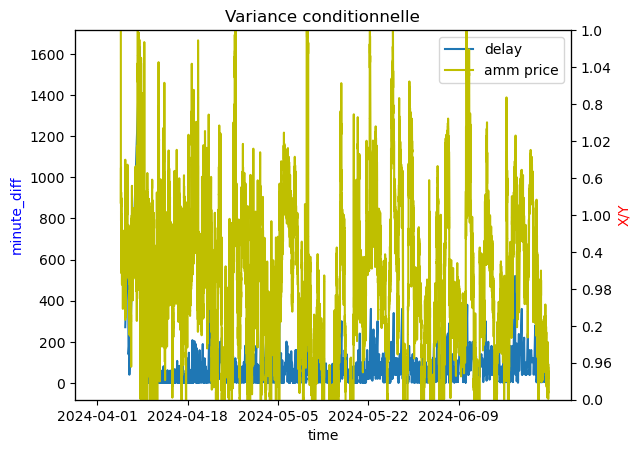

In [48]:
df = df[df['minute'] > '2024-04-01']
df['tb_diff'] = df['token0_balance'].diff()
df2 = df[df['tb_diff'] > 0]
df2['minute_diff'] = df2['minute'].diff()
df2['minute_diff'] = df2['minute_diff'] / np.timedelta64(1, 'm')
# Tracer la différence en fonction de df['minute']
fig, ax1 = plt.subplots()
ax1.plot(df2['minute'], df2['minute_diff'], label = 'delay')
ax1.set_xlabel('time')
ax1.set_ylabel('minute_diff', color='b')

ax2 = ax1.twinx()

model = arch_model(0.01*df['price0']/df['price1'], vol='Garch', p=1, q=1)
# Ajuster le modèle
model_fit = model.fit()
conditional_var = model_fit.conditional_volatility/25

ax2.plot(df['minute'],(df['price0']*df['token0_balance']/(df['price1']*df['token1_balance'])), color = 'y', label = 'amm price')
ax2.set_ylabel('X/Y', color='r')
ax2.set_ylim(0.95, 1.05)
ax3 = ax1.twinx()
#ax3.plot(df['time'], conditional_var, label ='variance', color = 'g')
#ax3.set_ylabel('conditional_var', color='g')
ax1.set_xticks(df['minute'][::25000])
# Collect handles and labels for each plot
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
#handles3, labels3 = ax3.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles1 + handles2 #+ handles3
all_labels = labels1 + labels2 #+ labels3

# Create a single legend
ax1.legend(all_handles, all_labels, loc='best')
plt.title('Variance conditionnelle')
plt.show()

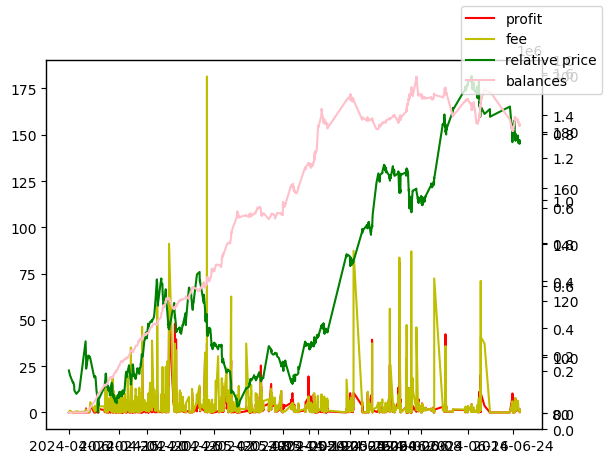

-0.0370057008414592
count    1842.000000
mean        2.760614
std         4.615268
min         0.000068
25%         0.359095
50%         1.466910
75%         3.432036
max        81.064113
Name: profit, dtype: float64
count    1842.000000
mean        4.002369
std         7.984163
min         0.000865
25%         0.985899
50%         2.400329
75%         4.551471
max       181.461296
Name: fee, dtype: float64
count    504.000000
mean       1.418774
std        1.561424
min        0.000183
25%        0.248114
50%        0.816672
75%        2.381286
max       10.741028
Name: delta, dtype: float64
39842    0x1293b050c9a6f1fb4738c5442984fc049a6120361ffc...
48632    0x1b827dd057af9d12233aad9c2de3664f5ceb1950ffab...
48672    0x1c3a4dbbe1fd20f4ee815cf07eaac3e0609cd737b637...
60913    0x05d956d715c46d867527945881ae39b75f7f47dc42c7...
60922    0xde2b4bb17b086713547a34f530dda0373f0e4acb09c9...
Name: tx_hash, dtype: object
                                                  tx_hash     profit  \
97430

In [52]:
fee = 0.02
fig, ax1 = plt.subplots()


df = df2[df2['token0_transfer'] !=0]
df = df[df['token1_transfer'] !=0]
df = df[(df['provision_rebalancing']==False)]
df = df[(df['minute'] >='2024-05-16') | (df['minute'] < '2024-05-15')]


df['profit'] = df['token0_transfer']*df['price0']/10**df['decimals0']*df['token1_balance_usd']/(df['token0_balance_usd']-df['token0_transfer']*df['price0']/10**df['decimals0'])+(df['token1_transfer'])*df['price1']/10**df['decimals1']
df['fee'] = fee*abs(df['token0_transfer']*df['price0']/10**df['decimals0'])
df['delta'] = df['profit']-df['fee']

ax1.plot(df[df['profit']<600]['minute'],df[df['profit']<600]['profit'], color = 'r', label = 'profit')
#ax1.plot(df['minute'],df['minute_diff']/10, label = 'time delay')
ax1.plot(df['minute'],df['fee'], color = 'y', label = 'fee')
ax2 = ax1.twinx()
df['relative_price'] = df['price0']/df['price1']
ax2.plot(df['minute'],df['relative_price'], color = 'g', label = 'relative price')
ax3 = ax1.twinx()
ax3.plot(df['minute'],df['token0_balance_usd']+df['token1_balance_usd'], color = 'pink', label = 'balances')

df = df.sort_values(by='minute')
t = 15
ax5 = ax1.twinx()
df['delta_price'] = df['relative_price'].rolling(t).max()-df['relative_price'].rolling(t).min()
#ax5.plot(df['minute'],df['delta_price'], color = 'blue', label = 'delta price')
correlation = df['profit'].corr(df['minute_diff'])
ax1.set_xticks(df['minute'][::120])

fig.legend()
plt.show()

print(correlation)
print(df['profit'].describe())
print(df['fee'].describe())

print(df[df['fee']<df['profit']]['delta'].describe())
#print(df[df['fee']<df['profit']].head(10))
print(df[df['fee']<df['profit']]['tx_hash'].head())

df = df.sort_values(by='delta', ascending=False)
print(df[['tx_hash','profit', 'delta','minute', 'provision_rebalancing', 'token1_balance_usd', 'token1_transfer', 'price1', 'token0_balance_usd', 'token0_transfer', 'price0']].head(10))

Summary of different reasons for LVR extraction possibilites:
 - Fast price increase (e.g. block 19913100 - 19913270) -> solvers are not fast enough
 - LVR prevented by solvers after unilateral liqudity provision
 - For SAFE/WETH : one transaction highly optimized by Quasilabs 0x8404b2a62ea5675c3624feb729bdece7c579c1c1f8dfea21890362786c856869